In [164]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import scipy
import re
import missingno as mso
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pandas as pd

In [165]:
data=pd.read_csv("/content/sample_data/seattle-weather.csv")
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [166]:
data.shape

(1461, 6)

In [167]:
data.notnull().sum()

date             1461
precipitation    1461
temp_max         1461
temp_min         1461
wind             1461
weather          1461
dtype: int64

In [168]:
data.duplicated().sum()

0

In [169]:
data.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [171]:
data.describe(include="all")

,date,precipitation,temp_max,temp_min,wind,weather
count,1461,1461.000000,1461.000000,1461.000000,1461.000000,1461
unique,1461,NaN,NaN,NaN,NaN,5
top,2012-01-01,NaN,NaN,NaN,NaN,rain
freq,1,NaN,NaN,NaN,NaN,641
mean,NaN,3.029432,16.439083,8.234771,3.241136,NaN
std,NaN,6.680194,7.349758,5.023004,1.437825,NaN
min,NaN,0.000000,-1.600000,-7.100000,0.400000,NaN
25%,NaN,0.000000,10.600000,4.400000,2.200000,NaN
50%,NaN,0.000000,15.600000,8.300000,3.000000,NaN
75%,NaN,2.800000,22.200000,12.200000,4.000000,NaN


In [172]:
data.dropna()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [173]:
data.duplicated().sum()

0

In [174]:
data["weather"].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [175]:
data.nunique()

date             1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64

In [176]:
data.weather.value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

In [177]:
data["date"]=pd.to_datetime(data["date"])

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [179]:
countrain=len(data[data.weather=='rain'])
countsun=len(data[data.weather=='sun'])
countdrizzle=len(data[data.weather=='drizzle'])
countsnow=len(data[data.weather=='snow'])
countfog=len(data[data.weather=='fog'])
print('percent of rain:{:2f}%'.format((countrain/(len(data.weather))*100)))
print('percent of sun:{:2f}%'.format((countsun/(len(data.weather))*100)))
print('percent of drizzle:{:2f}%'.format((countdrizzle/(len(data.weather))*100)))
print('percent of snow:{:2f}%'.format((countsnow/(len(data.weather))*100)))
print('percent of fog:{:2f}%'.format((countfog/(len(data.weather))*100)))

percent of rain:43.874059%
percent of sun:43.805613%
percent of drizzle:3.627652%
percent of snow:1.779603%
percent of fog:6.913073%


<Axes: xlabel='wind', ylabel='Count'>

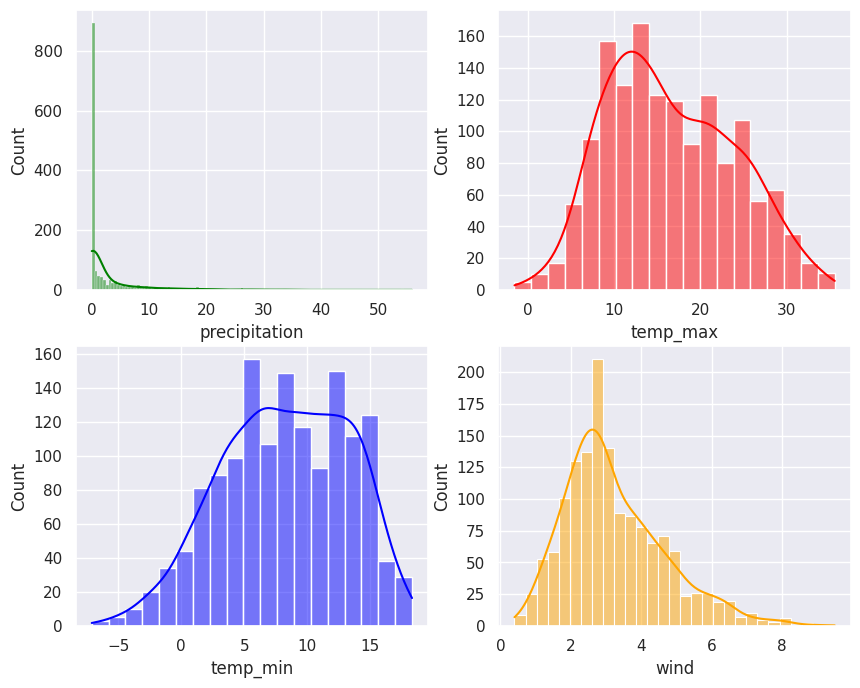

In [180]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=data,x='precipitation',kde=True,ax=axs[0,0],color='green')
sns.histplot(data=data,x='temp_max',kde=True,ax=axs[0,1],color='red')
sns.histplot(data=data,x='temp_min',kde=True,ax=axs[1,0],color='blue')
sns.histplot(data=data,x='wind',kde=True,ax=axs[1,1],color='orange')

In [181]:
data.head(20)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


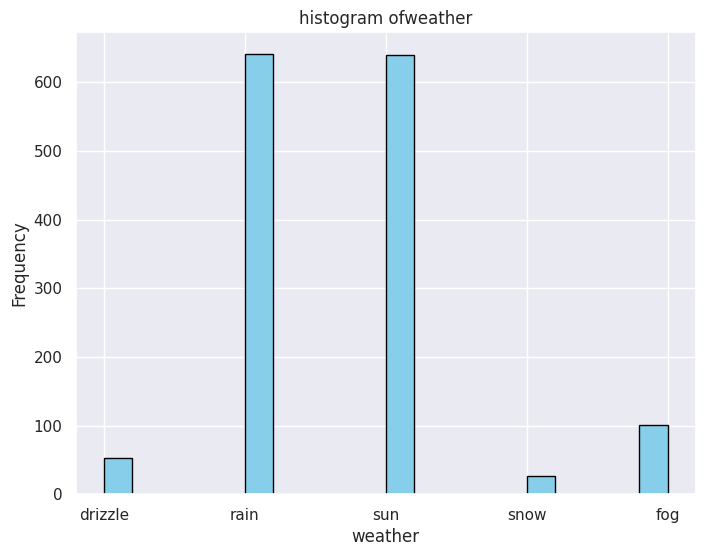

In [182]:
col="weather"
plt.figure(figsize=(8,6))
plt.hist(data[col],bins=20,color="skyblue",edgecolor="black")
plt.xlabel("weather")
plt.ylabel("Frequency")
plt.title("histogram of"+col)
plt.grid(True)
plt.show()

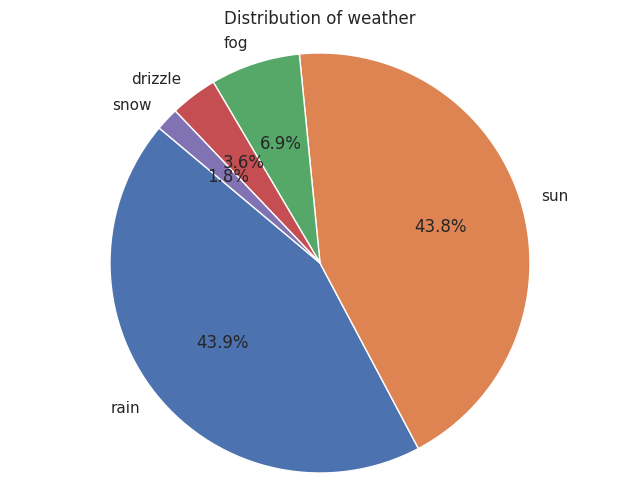

In [183]:
counts=data[col].value_counts()
plt.figure(figsize=(8,6))
plt.pie(counts,labels=counts.index,autopct="%1.1f%%",startangle=140)
plt.title("Distribution of "+col)
plt.axis("equal")
plt.show()

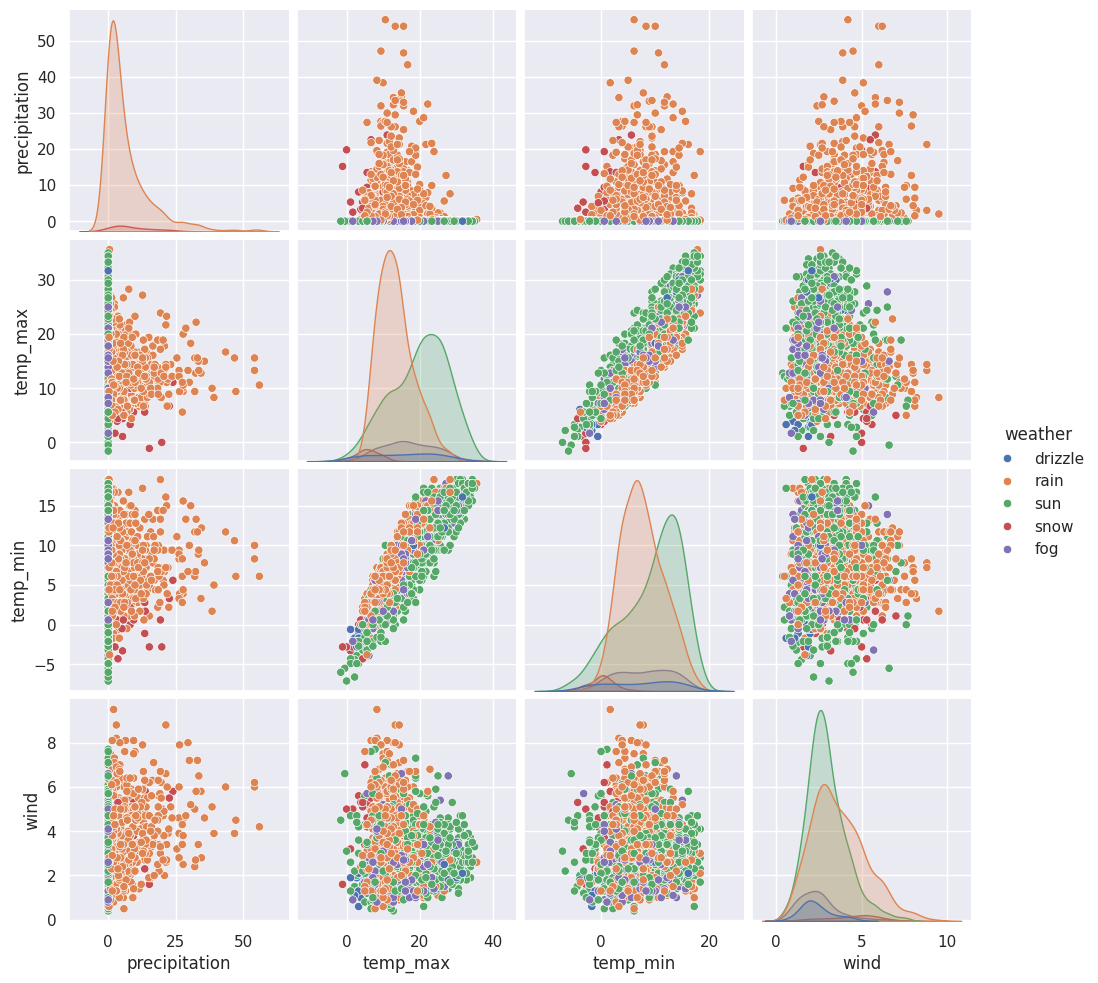

In [184]:
sns.pairplot(data,hue="weather")

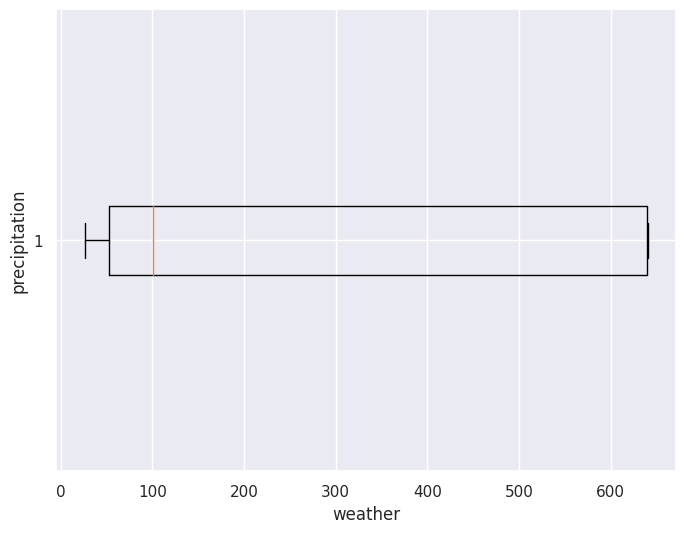

In [185]:
plt.figure(figsize=(8,6))
plt.boxplot(data.groupby(col).size(),vert=False)# to create horizontal box plot
plt.xlabel("weather")
plt.ylabel("precipitation")
plt.grid(True)#add gridlines to plot
plt.show()

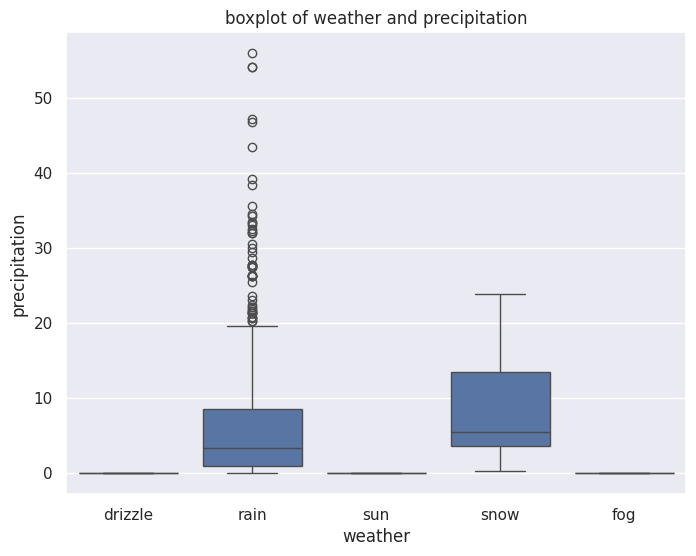

In [186]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data, x='weather', y='precipitation')
plt.xlabel('weather')
plt.ylabel('precipitation')
plt.title('boxplot of weather and precipitation')
plt.show()

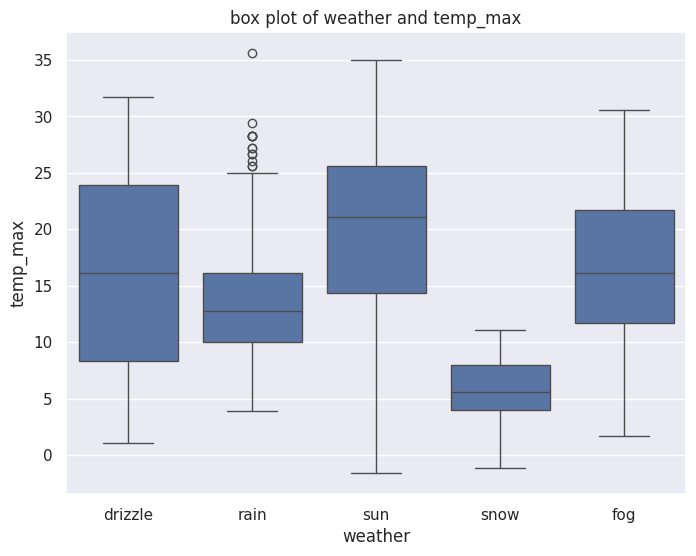

In [187]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data, x='weather', y='temp_max')
plt.xlabel('weather')
plt.ylabel('temp_max')
plt.title('box plot of weather and temp_max')
plt.show()

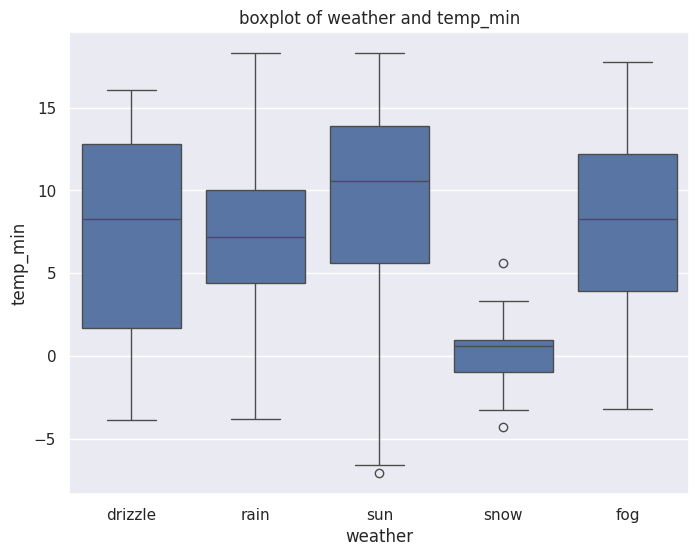

In [188]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data, x='weather', y='temp_min')
plt.xlabel('weather')
plt.ylabel('temp_min')
plt.title('boxplot of weather and temp_min')
plt.show()

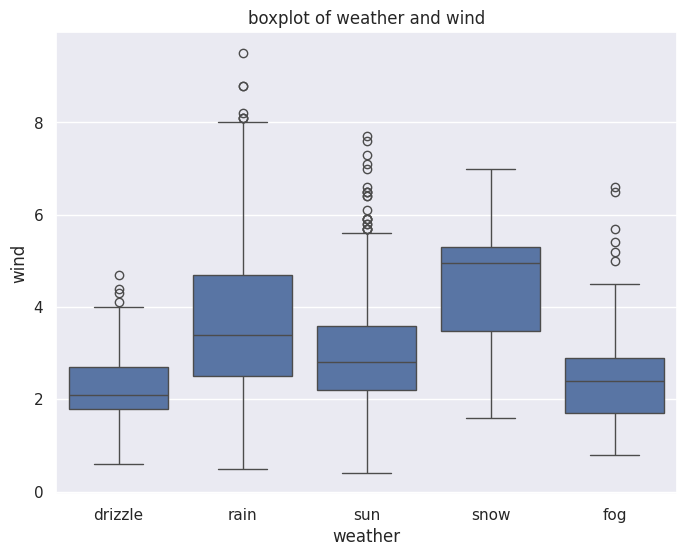

In [189]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data, x='weather', y='wind')
plt.xlabel('weather')
plt.ylabel('wind')
plt.title('boxplot of weather and wind')
plt.show()

pearsons correlation:  -0.22855481643297046
T test and P value:  TtestResult(statistic=-51.60685279531918, pvalue=0.0, df=2920.0)


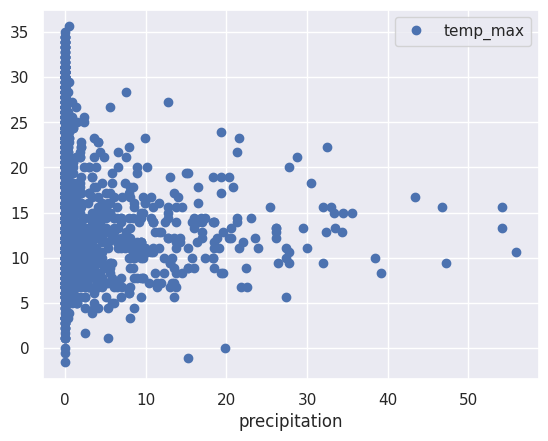

In [190]:
data.plot("precipitation",'temp_max',style='o')
print('pearsons correlation: ',data['precipitation'].corr(data['temp_max']))
print('T test and P value: ',stats.ttest_ind(data['precipitation'],data['temp_max']))

pearsons correlation:  -0.16485663487495486
T test and P value:  TtestResult(statistic=-67.3601643301846, pvalue=0.0, df=2920.0)


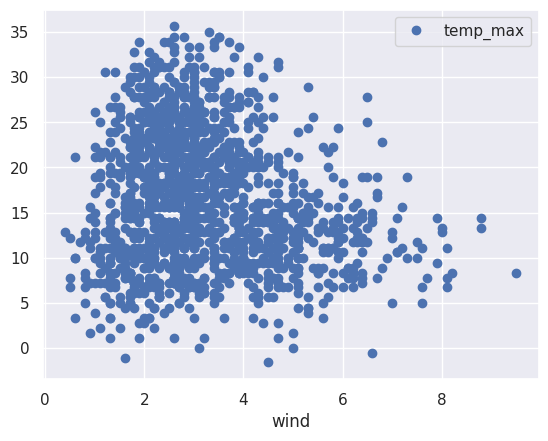

In [191]:
data.plot("wind",'temp_max',style='o')
print('pearsons correlation: ',data['wind'].corr(data['temp_max']))
print('T test and P value: ',stats.ttest_ind(data['wind'],data['temp_max']))

<Axes: xlabel='temp_max'>

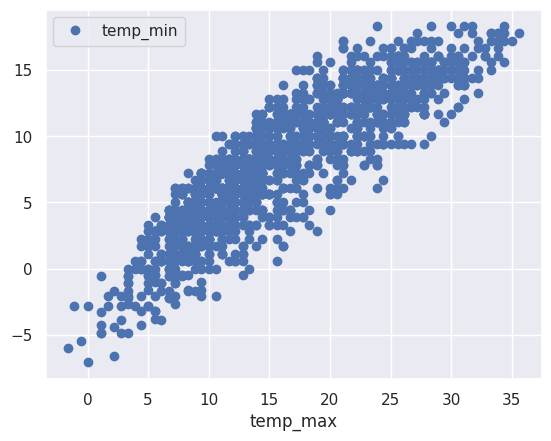

In [192]:
data.plot('temp_max','temp_min',style='o')

In [193]:
data.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

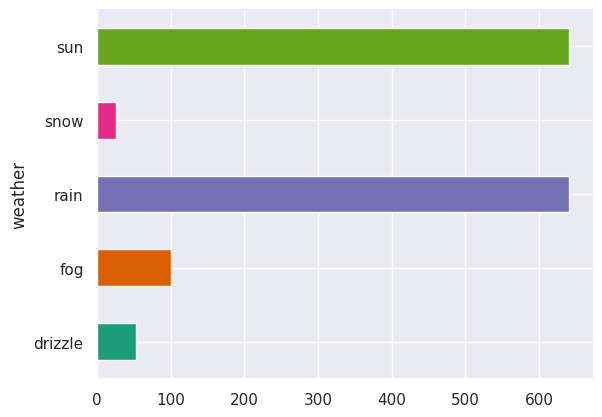

In [194]:


from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('weather').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [195]:
import numpy as np
data.precipitation=np.sqrt(data.precipitation)
data.wind=np.sqrt(data.wind)

In [196]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.000000,12.8,5.0,2.167948,drizzle
1,2012-01-02,3.301515,10.6,2.8,2.121320,rain
2,2012-01-03,0.894427,11.7,7.2,1.516575,rain
3,2012-01-04,4.505552,12.2,5.6,2.167948,rain
4,2012-01-05,1.140175,8.9,2.8,2.469818,rain


In [197]:
lc=LabelEncoder()
data['weather']=lc.fit_transform(data['weather'])

In [198]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.000000,12.8,5.0,2.167948,0
1,2012-01-02,3.301515,10.6,2.8,2.121320,2
2,2012-01-03,0.894427,11.7,7.2,1.516575,2
3,2012-01-04,4.505552,12.2,5.6,2.167948,2
4,2012-01-05,1.140175,8.9,2.8,2.469818,2


In [199]:
x=((data.loc[:,data.columns!='weather']).astype(int)).values[:,0:]
y=data['weather'].values

In [200]:
data.weather.unique()

array([0, 2, 4, 3, 1])

In [201]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [202]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print('KNN accuracy:{:.2f}%'.format(knn.score(x_test,y_test)*100))

KNN accuracy:70.07%


In [203]:
svm=SVC()
svm.fit(x_train,y_train)
print('SVM accuracy:{:.2f}%'.format(svm.score(x_test,y_test)*100))

SVM accuracy:35.37%


In [204]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a multiple linear regression model
mlr = LinearRegression()

# Train the model
mlr.fit(x_train, y_train)

# Make predictions on the test set
y_pred = mlr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print('Mean Squared Error:', mse)
print('R-squared:', r2)

# Note: In linear regression, accuracy is commonly measured using metrics like R-squared or Mean Squared Error.


Mean Squared Error: 1.102362510678417
R-squared: 0.08759952913858138


In [205]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Create a Ridge Regression model
ridge = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization strength

# Train the model
ridge.fit(x_train, y_train)

# Make predictions on the test set
y_pred_ridge = ridge.predict(x_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print the results
print('Ridge Regression Mean Squared Error:', mse_ridge)
print('Ridge Regression R-squared:', r2_ridge)

Ridge Regression Mean Squared Error: 0.9703256378440704
Ridge Regression R-squared: 0.19688345686484898


In [206]:
r2_percentage = r2_ridge * 100
print('Ridge Regression R-squared (percentage): {:.2f}%'.format(r2_percentage))


Ridge Regression R-squared (percentage): 19.69%


In [207]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score

# Create and train multiple linear regression model
mlr = LinearRegression()
mlr.fit(x_train, y_train)
y_pred_mlr = mlr.predict(x_test)
r2_mlr = r2_score(y_test, y_pred_mlr)

# Create and train Ridge regression model
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print the results
print('Multiple Linear Regression R-squared (percentage): {:.2f}%'.format(r2_mlr * 100))
print('Ridge Regression R-squared (percentage): {:.2f}%'.format(r2_ridge * 100))


Multiple Linear Regression R-squared (percentage): 8.76%
Ridge Regression R-squared (percentage): 19.69%


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Assuming you have already defined x_train, x_test, y_train, y_test

# Train multiple linear regression model
mlr = LinearRegression()
mlr.fit(x_train, y_train)
y_pred_mlr = mlr.predict(x_test)
r2_mlr = r2_score(y_test, y_pred_mlr)

# Train Ridge regression model
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Train KNN model
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_accuracy = knn.score(x_test, y_test) * 100

# Train SVM model
svm = SVC()
svm.fit(x_train, y_train)
svm_accuracy = svm.score(x_test, y_test) * 100

# Create a bar graph
models = ['MLR', 'Ridge', 'KNN', 'SVM']
accuracies = [r2_mlr * 100, r2_ridge * 100, knn_accuracy, svm_accuracy]

plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy/R-squared (%)')
plt.title('Model Comparison')
plt.ylim([0, 100])  # Set y-axis limit for proper scaling
plt.show()


In [209]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('/content/sample_data/seattle-weather.csv')

# Train the model
# Split data into features and target variable
X = data[['precipitation', 'temp_max', 'temp_min', 'wind']]
y = data['weather']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training (SVM Classifier)
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Example prediction
# Replace the values with the features of the new data
new_data = pd.DataFrame({
    'precipitation': [0],
    'temp_max': [40],
    'temp_min': [25],
    'wind': [0]
})

prediction = model.predict(new_data)
print("Predicted weather:", prediction[0])

Accuracy: 0.8293515358361775
Predicted weather: sun


In [210]:

print("""
Weather Prediction:

- Precipitation: 4.1
- Temperature Max: 4.4
- Temperature Min: 0.6
- Wind: 5.3

Predicted Weather: Rainy
""")



Weather Prediction:

- Precipitation: 4.1
- Temperature Max: 4.4
- Temperature Min: 0.6
- Wind: 5.3

Predicted Weather: Rainy

